<a href="https://colab.research.google.com/github/Ashi743/ML-practices/blob/main/power_transformations_on_concrete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io

concrete_data (2) .csv

In [5]:
concrete= pd.read_csv('/content/concrete_data (2).csv')
concrete.head(10)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [6]:
#Feature engineering
concrete.info()
concrete.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
X=concrete.drop('Strength', axis=1)
Y=concrete['Strength']

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

def plot_hist(df):
    fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(10,10))
    ax = ax.flatten()

    for i, col in enumerate(df.columns):
        sns.histplot(data=df, x=col, ax=ax[i], kde=True)
        skewness = skew(df[col].dropna())  # Calculate skewness
        ax[i].set_title(f'{col} (Skewness: {skewness:.2f})')  # Add skewness to title

    for i in range(len(df.columns), len(ax)):
        fig.delaxes(ax[i])

    plt.tight_layout()
    plt.show()




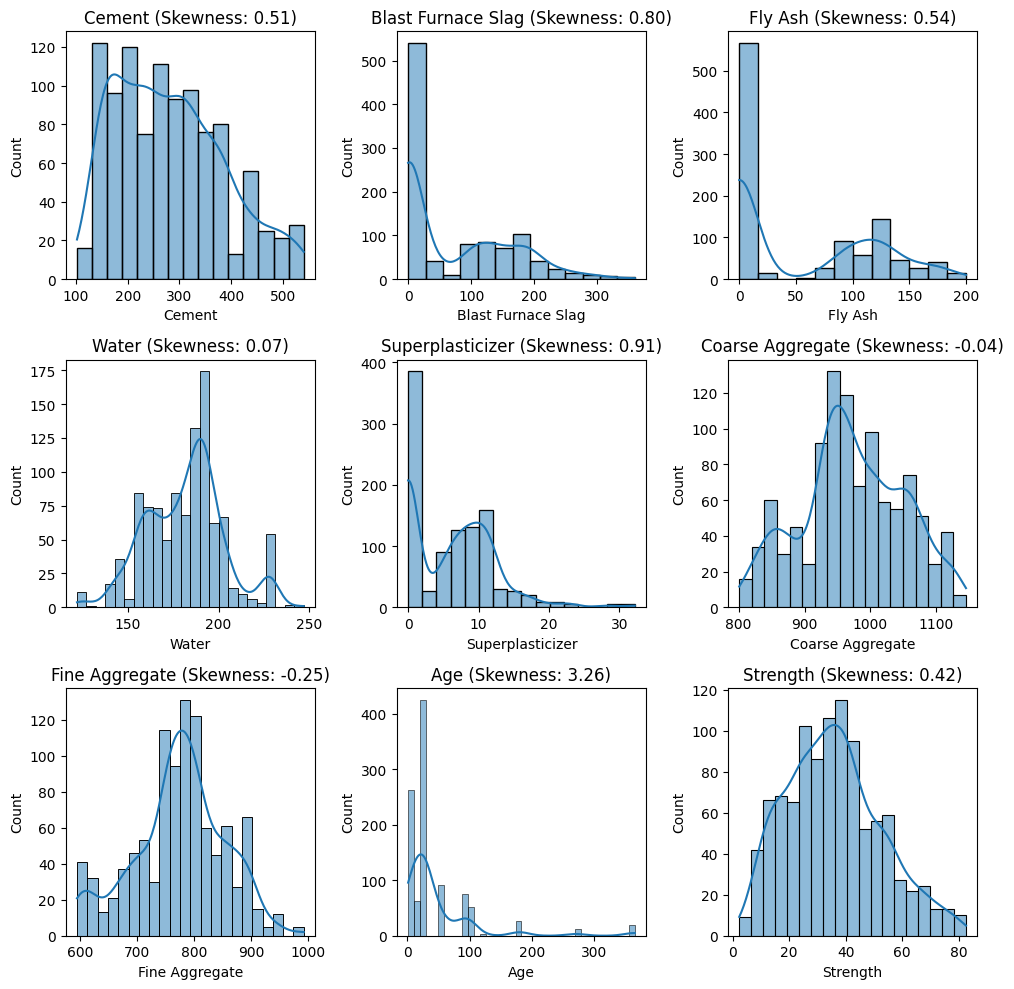

In [25]:
plot_hist(concrete)

data is continous in nature thus will use preferred model and accuracy

In [20]:
#skewness
def skewness(df):
  for i in df.columns:
    print(f'{i} : {df[i].skew()}')

skewness(concrete)

Cement : 0.509481178871773
Blast Furnace Slag : 0.8007168956061772
Fly Ash : 0.5373539058066844
Water : 0.07462838428549402
Superplasticizer : 0.9072025748672465
Coarse Aggregate : -0.04021974481106706
Fine Aggregate : -0.25300959769707576
Age : 3.26917740063459
Strength : 0.416977288410718


In [29]:
#initial predicions and scoring


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score

def modelling(df):
  X=df.drop('Strength', axis=1)
  Y=df['Strength']
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

  model = LinearRegression()
  model.fit(X_train, Y_train)

  Y_pred = model.predict(X_test)

  accuracy = r2_score(Y_test, Y_pred)
  print(f'Accuracy_: {accuracy}')


modelling(concrete)

Accuracy_: 0.627553179231485


Outlier detection

In [28]:
def cross_val(model, X,Y):
  cross_val = np.mean(cross_val_score(model, X, Y, scoring="r2", cv=5))
  print(f'Cross-validation Score: {cross_val:.4f}')


In [30]:
cross_val(LinearRegression(), X,Y)

Cross-validation Score: 0.4610


In [14]:
def outlier(df):
  for i in df.columns:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    df1=df[(df[i]>=lower_bound) & (df[i]<=upper_bound)]
  return df1

In [17]:
concrete1= outlier(concrete)
concrete1

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [23]:
skewness(concrete1)

Cement : 0.5104405604864943
Blast Furnace Slag : 0.804255436886611
Fly Ash : 0.5310237615235216
Water : 0.07315425393318786
Superplasticizer : 0.9054613403731758
Coarse Aggregate : -0.04279258618119135
Fine Aggregate : -0.2586899754011099
Age : 3.2667872037669152
Strength : 0.38576322954063064


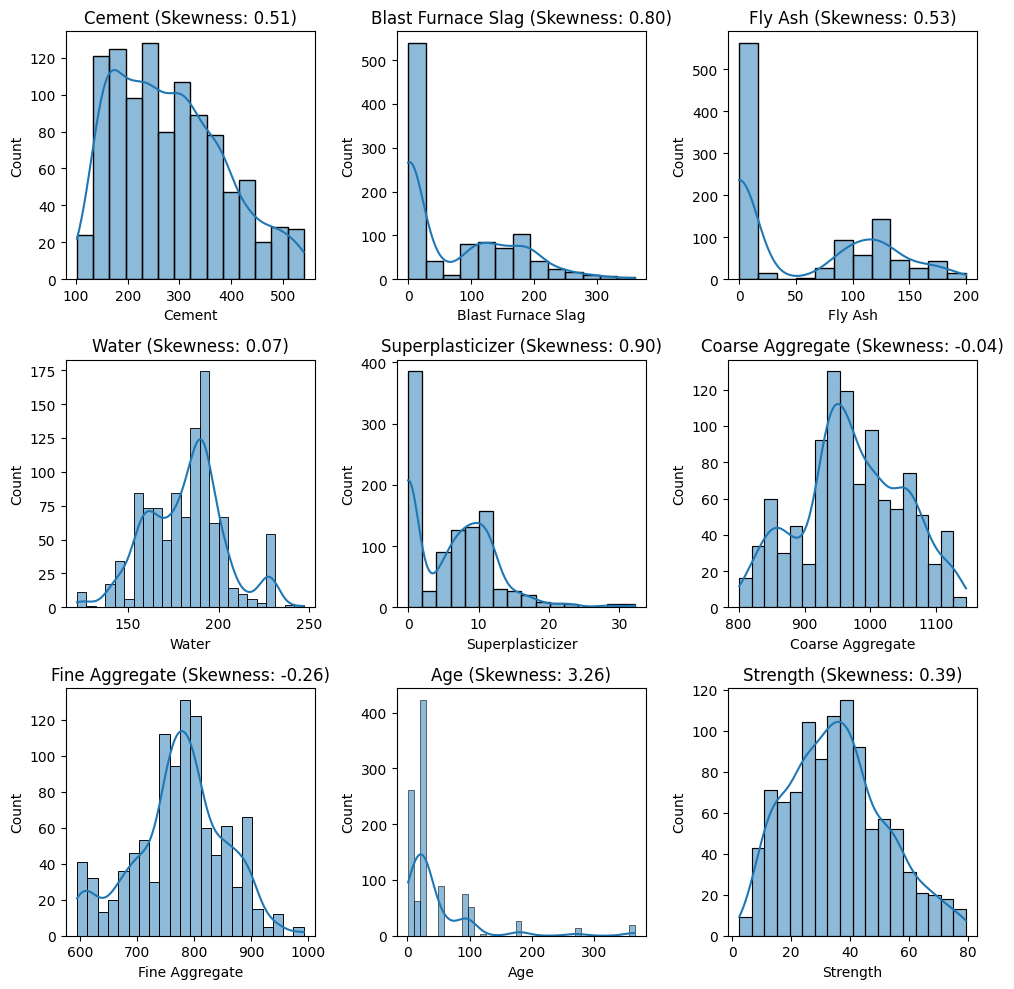

In [31]:
plot_hist(concrete1)

Transformations

In [49]:
#highly sklewed to normal distribution  boxcox +0.0001
from sklearn.preprocessing import PowerTransformer
pt= PowerTransformer(method= "box-cox")
X_train_trf=pt.fit_transform(X_train+0.0001)
X_test_trf=pt.transform(X_test+0.0001)

X_train_trf_df= pd.DataFrame(X_train_trf, columns=X_train.columns)
X_test_trf_df= pd.DataFrame(X_test_trf, columns=X_test.columns)

df_boxcox_lambdas = pd.DataFrame({
    "cols": X_train.columns,
    "boxcox_lambdas": pt.lambdas_
})

print(df_boxcox_lambdas)

                 cols  boxcox_lambdas
0              Cement        0.177025
1  Blast Furnace Slag        0.031051
2             Fly Ash       -0.052019
3               Water        0.772681
4    Superplasticizer        0.133968
5    Coarse Aggregate        1.129813
6      Fine Aggregate        1.782018
7                 Age        0.066626


In [50]:
linreg= LinearRegression()
linreg.fit(X_train_trf, Y_train)
Y_pred= linreg.predict(X_test_trf)
r2_score(Y_test, Y_pred)

0.8063539941031045

In [51]:
np.mean(cross_val_score(linreg, X_train_trf, Y_train, scoring="r2", cv=5))

0.792621400271104

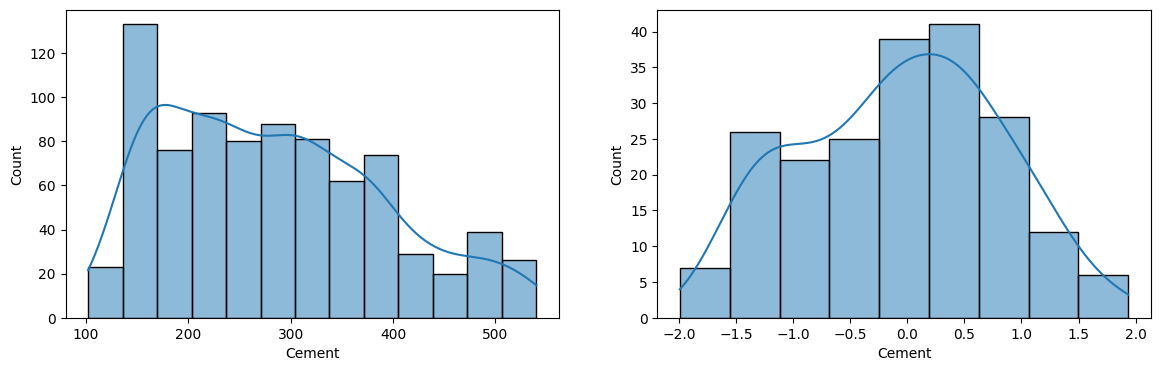

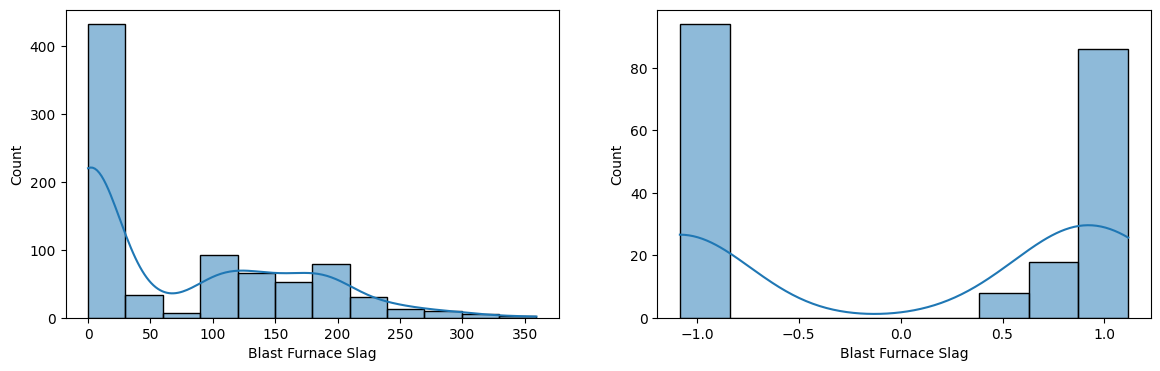

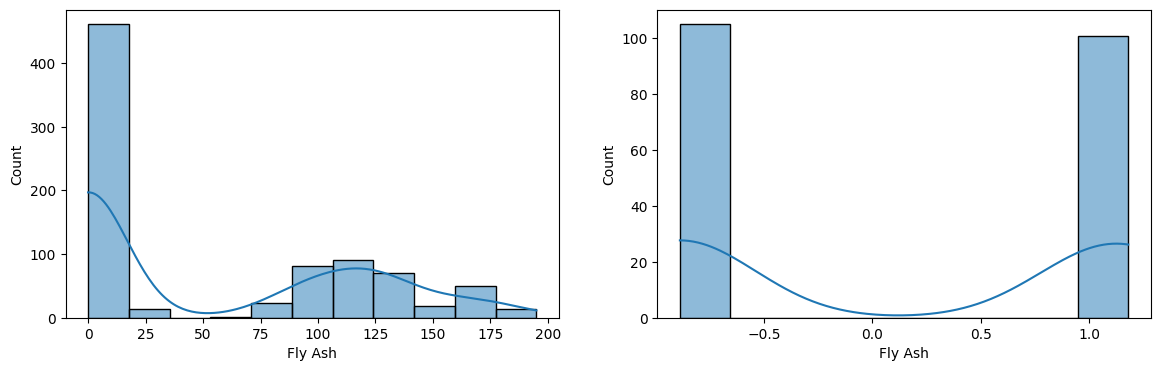

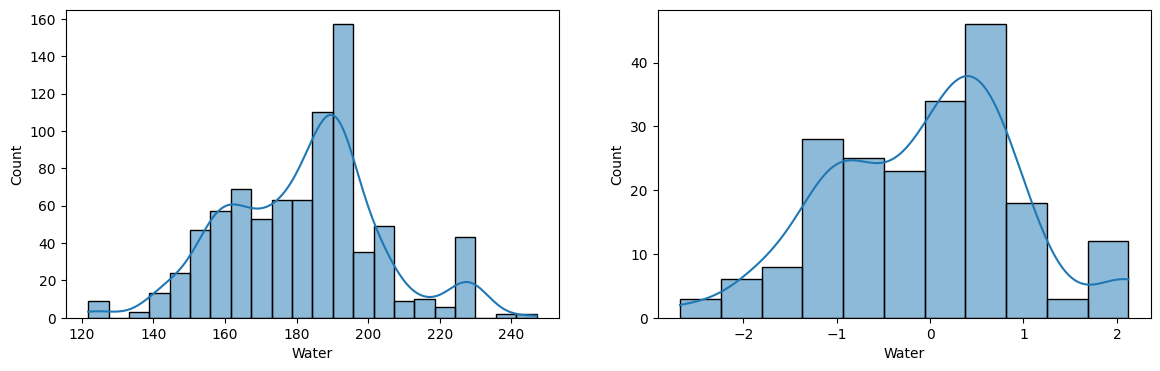

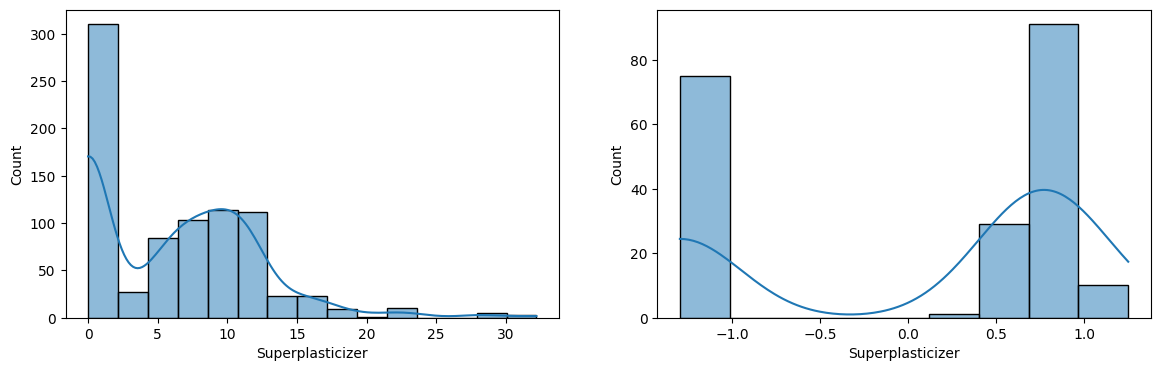

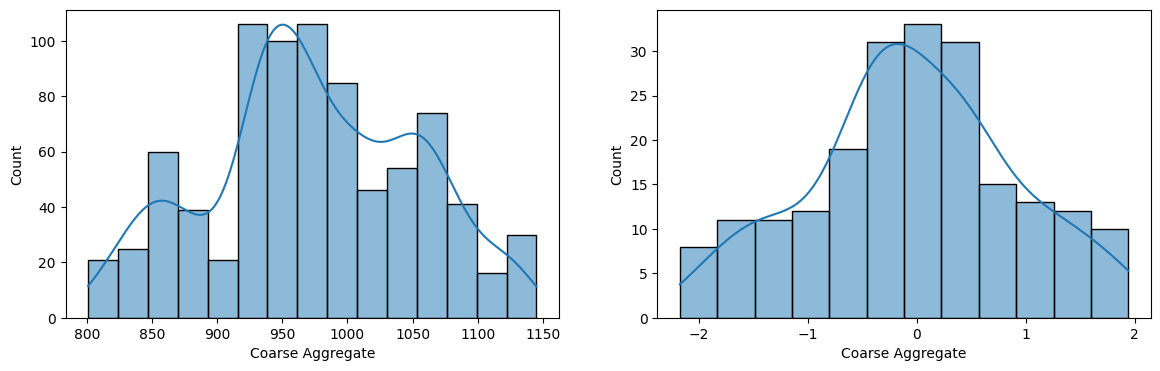

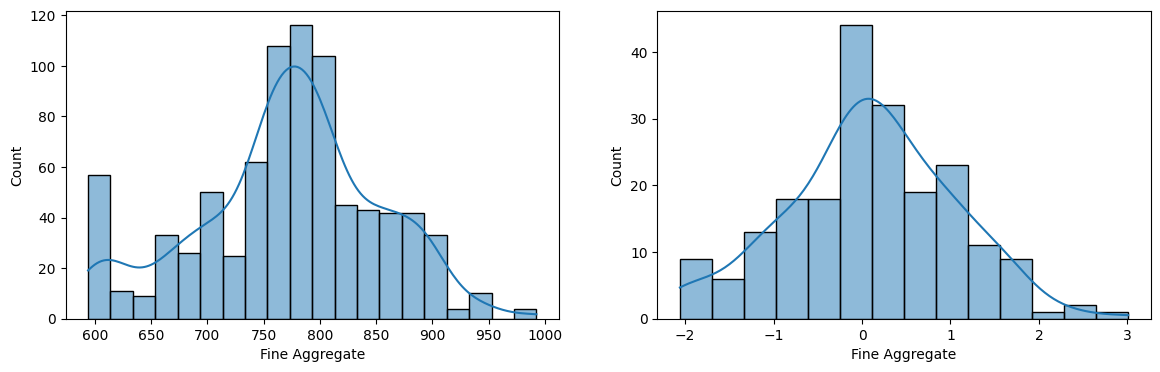

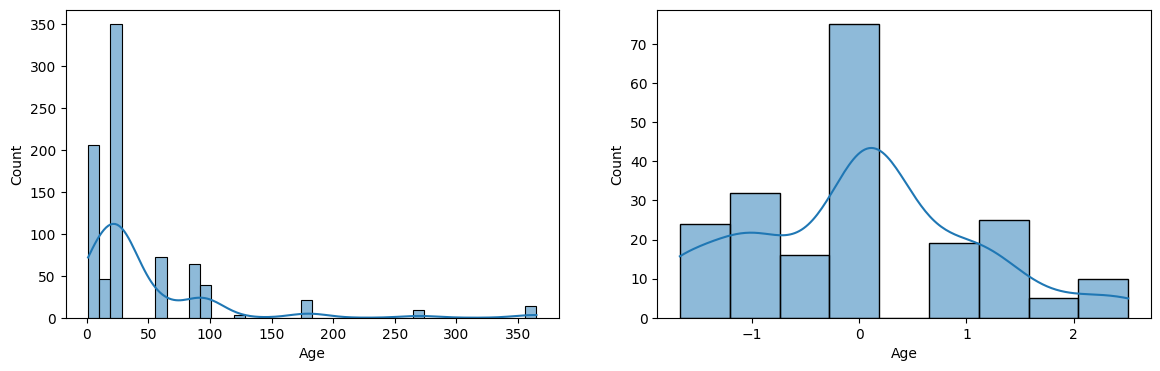

In [52]:
for col in X_train_trf_df.columns:
  plt.figure(figsize=(14,4))
  plt.subplot(121)
  sns.histplot(X_train[col], kde=True)
  plt.subplot(122)
  sns.histplot(X_test_trf_df[col], kde=True)
  plt.show()

In [53]:
#apply yeo johnson
pt1= PowerTransformer(method='yeo-johnson')
pt1.fit_transform(X_train)
pt1.transform(X_test)
x_train_trf_y=pt1.transform(X_train)
x_test_trf_y =pt1.transform(X_test)

X_train_trf_df2= pd.DataFrame(x_train_trf_y, columns=X_train.columns)
X_test_trf_df2= pd.DataFrame(x_test_trf_y, columns=X_test.columns)

df_yeo_johnson_lambdas = pd.DataFrame({
    "cols": X_train.columns,
    "box_cox_lambdas": pt.lambdas_,
    "yeo_johnson_lambdas": pt1.lambdas_
})

print(df_yeo_johnson_lambdas)

                 cols  box_cox_lambdas  yeo_johnson_lambdas
0              Cement         0.177025             0.174348
1  Blast Furnace Slag         0.031051             0.015715
2             Fly Ash        -0.052019            -0.161447
3               Water         0.772681             0.771307
4    Superplasticizer         0.133968             0.253935
5    Coarse Aggregate         1.129813             1.130050
6      Fine Aggregate         1.782018             1.783100
7                 Age         0.066626             0.019885


In [54]:
linreg2= LinearRegression()
linreg2.fit(x_train_trf_y, Y_train)
Y_pred= linreg2.predict(x_test_trf_y)
r2_score(Y_test, Y_pred)

0.8161906512004999